#Product Recommendation system using Word2Vec

In [0]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c instacart-market-basket-analysis

In [0]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
from prettytable import PrettyTable
from tabulate import tabulate
from zipfile import ZipFile

In [0]:

z1=ZipFile('/content/aisles.csv.zip','r')
z1.extractall()
z2=ZipFile('/content/departments.csv.zip','r')
z2.extractall()
z3=ZipFile('/content/order_products__train.csv.zip','r')
z3.extractall()
z4=ZipFile('/content/orders.csv.zip','r')
z4.extractall()
z5=ZipFile('/content/products.csv.zip','r')
z5.extractall()
z6=ZipFile('/content/order_products__prior.csv.zip','r')
z6.extractall()

In [0]:
aisles=pd.read_csv('/content/aisles.csv')
dept=pd.read_csv('/content/departments.csv')
order_p=pd.read_csv('/content/order_products__train.csv')
order=pd.read_csv('/content/orders.csv')
products=pd.read_csv('/content/products.csv')
order_prior=pd.read_csv('/content/order_products__prior.csv')

In [0]:
aisles.head(10)

In [0]:
dept.head(10)

In [0]:
order_p.head(10)

In [0]:
order.head(10)

In [0]:
products.head(10)

In [0]:
order_prior.head(10)

In [75]:
result=pd.merge(order,order_p,on='order_id')
# result.head(10)
result=pd.merge(result,products,on='product_id')
# result.head(20)
data=result[['product_id','product_name','user_id']]
# data.head(20)
data=data.sample(frac=1)
data['product_id']=data['product_id'].astype(str)
# data.info()
# data.product_id.head()

651120      5883
523237     17795
1345111    24522
613737     23543
61509      13198
Name: product_id, dtype: object

In [0]:
customers=[i for i in  data['user_id'].unique()]


In [77]:
# data[data['user_id']==149753 ]

,product_id,product_name,user_id
66287,27104,Fresh Cauliflower,149753
458321,48015,Lime Slim Can,149753
654893,43772,Cherubs Heavenly Salad Tomatoes,149753
885147,36962,Dill Pickle Spears,149753
642082,24186,Slim Can Pink Grapefruit Natural Mineral Water,149753
...,...,...,...
136905,13481,Extra Noodle Soup Mix,149753
51695,16185,Sharp Cheddar Cheese,149753
471152,18272,Slices Cheddar Cheese,149753
1117758,37836,Milano Milk Chocolate Cookies,149753


In [0]:
purchase=[]
cust_pr={}
for j,i in enumerate(customers):
    temp=data[data['user_id']==i]['product_id']
    cust_pr[i]=list(temp)
    purchase.append(list(temp))
    if j%10000==0:
        print(f'{(j/len(customers))*100:.4f}% done!! ')
# purchase

In [88]:
model2=Word2Vec(sg=1,window=10,negative=10)
model2.build_vocab(purchase,progress_per=200)
model2.train(purchase,total_examples=model.corpus_count,epochs=10, report_delay=1)

(12943898, 13846170)

In [104]:
prod=data[['product_id','product_name']]
prod.drop_duplicates(inplace=True, subset='product_id', keep="last")
prod_dict={i:j for i,j in zip(prod['product_id'],prod['product_name'])}
prod_dict['25844']

'Double Rolls Bath Tissue'

In [235]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

def recommend(pr):
    re=model2.similar_by_vector(pr)
    t = PrettyTable(['Recommended Products', 'Score'])
    for i in re:
        t.add_row([prod_dict[i[0]], i[1]])
    print(t)
      

def user_product_recommend(test):
    hist=[i for i in cust_pr[test]]
    print('User purchase history')
    user_history(test)
    mean=aggregate_vectors(hist)
    print('Recommended products')
    recommend(mean)


def user_history(cust_id):
    t = PrettyTable(['Products', 'Products Id'])
    for l in cust_pr[cust_id]:
        t.add_row([prod_dict[l],l])
    print(t)




+---------------------------------+--------------------+
|       Recommended Products      |       Score        |
+---------------------------------+--------------------+
|   Riserva Pasta Sauce Marinara  | 0.8813945055007935 |
|  Robusto Italian Salad Dressing | 0.8728744983673096 |
|      Mushroom Italian Sauce     | 0.8714109063148499 |
| Stovetop Cornbread Stuffing Mix | 0.8661739230155945 |
|     Overstuffed Beef Ravioli    | 0.8602940440177917 |
| Shredded Steak & Cheese Burrito | 0.8598881363868713 |
|      Sweet Honey BBQ Sauce      | 0.8577183485031128 |
|        Picante Hot Saucee       | 0.8570480346679688 |
|       Honey Smoked Turkey       | 0.8570410013198853 |
|      Creamy Potato Soup Mix     | 0.8541343808174133 |
+---------------------------------+--------------------+


In [261]:
print('Selecting random customer')

test=random.choice(list(cust_pr.keys()))
print(f'Id of random selected customer --> {test}')
print('*-'*90)
user_product_recommend(test)


Selecting random customer
Id of random selected customer --> 119683
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
User purchase history
+------------------------------------------+-------------+
|                 Products                 | Products Id |
+------------------------------------------+-------------+
| Natural Boneless Skinless Chicken Thighs |    44277    |
|           Organic Blueberries            |    39275    |
|          Whole White Mushrooms           |    47890    |
|        Pure Granulated Cane Sugar        |     397     |
|        Laundry Soil Stain Remover        |     416     |
|            European Cucumber             |      45     |
+------------------------------------------+-------------+
Recommended products
+----------------------------------------+--------------------+
|          Recommended Products          |       Score

In [267]:
##recommendation using product

def pr_recommend(pr=None):
        if pr is None:
            test=random.choice(list(prod_dict.keys()))
            if test in model2.wv.vocab:
                print(f"""Random Selected product \
                        Id {test} Name {prod_dict[test]}""")
                recommend(test)
        else:
            recommend(pr)
pr_recommend('19736')

+------------------------------------------+--------------------+
|           Recommended Products           |       Score        |
+------------------------------------------+--------------------+
|          Cheese Melts Crackers           | 0.7047203779220581 |
|           Red Wax Gouda Cheese           | 0.6900476217269897 |
|       Stoned Wheat Thins Crackers        | 0.6795103549957275 |
|     Entertainment Cracker Collection     | 0.6792409420013428 |
|  Multi Grain Everything Tortilla Chips   | 0.6768620610237122 |
|         Simply Strawberry Gelato         | 0.6746490001678467 |
|           Double Cream Cremont           | 0.6722469329833984 |
| Table Water Crackers with Cracked Pepper | 0.6665410995483398 |
|          Iced Lemon Pound Cake           | 0.665578305721283  |
|   Organic Whole Wheat Sourdough Bread    | 0.6626914739608765 |
+------------------------------------------+--------------------+


In [266]:
# '20828': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5208>,
#  '49615': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5240>,
#  '19736': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5278>,
#  '48205': <gensim.models.keyedvectors.Vocab at 0x7f19af5b52b0>,
#  '38357': <gensim.models.keyedvectors.Vocab at 0x7f19af5b52e8>,
#  '22309': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5320>,
#  '7644': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5358>,
#  '480': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5390>,
#  '37092': <gensim.models.keyedvectors.Vocab at 0x7f19af5b53c8>,
#  '41351': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5400>,
#  '717': <gensim.models.keyedvectors.Vocab at 0x7f19af5b5438>,

{'5883': <gensim.models.keyedvectors.Vocab at 0x7f19ac2fd3c8>,
 '28985': <gensim.models.keyedvectors.Vocab at 0x7f19ac2fd9b0>,
 '22247': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6c88>,
 '24964': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6198>,
 '39871': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc63c8>,
 '43789': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6da0>,
 '16168': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6748>,
 '43465': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6908>,
 '7041': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6128>,
 '14870': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6278>,
 '47209': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6860>,
 '17795': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6518>,
 '31663': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc60b8>,
 '18465': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6240>,
 '30492': <gensim.models.keyedvectors.Vocab at 0x7f19b2dc6400>,
 '13176': <gensim.models.keyedvectors.Voca

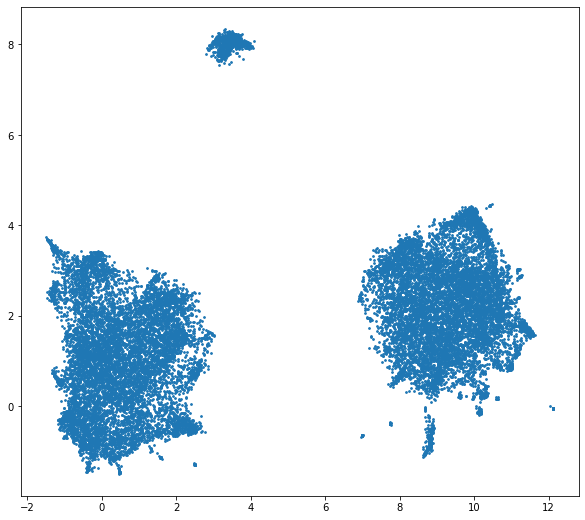

In [115]:
model2.init_sims(replace=True)

X = model2[model2.wv.vocab]

import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')